In [14]:
!wget --no-check-certificate \
        https://namespace.co.ke/ml/dataset.zip \
        -O /tmp/catsdogs.zip

    
!wget --no-check-certificate \
    https://upload.wikimedia.org/wikipedia/commons/1/18/Dog_Breeds.jpg \
    -O /tmp/dog.jpg

--2021-09-12 16:41:40--  https://namespace.co.ke/ml/dataset.zip
Resolving namespace.co.ke (namespace.co.ke)... 109.106.250.14
Connecting to namespace.co.ke (namespace.co.ke)|109.106.250.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228894139 (218M) [application/zip]
Saving to: ‘/tmp/catsdogs.zip’

/tmp/catsdogs.zip   100%[===================>] 218,29M  1,55MB/s    in 21m 11s 

2021-09-12 17:02:52 (176 KB/s) - ‘/tmp/catsdogs.zip’ saved [228894139/228894139]

--2021-09-12 17:02:52--  https://upload.wikimedia.org/wikipedia/commons/1/18/Dog_Breeds.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70761 (69K) [image/jpeg]
Saving to: ‘/tmp/dog.jpg’

/tmp/dog.jpg        100%[===================>]  69,10K   171KB/s    in 0,4s    

2021-09-12 17:02:54 (171 KB/s) - ‘/tmp/do

In [15]:
import os
import zipfile
with zipfile.ZipFile('/tmp/catsdogs.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/cats_dogs')

In [16]:
base_dir = '/tmp/cats_dogs/dataset'
train_dir = os.path.join(base_dir, 'training_set')
test_dir = os.path.join(base_dir, 'test_set')

In [17]:
import os
os.listdir(base_dir)

['single_prediction', 'training_set', 'test_set', '.DS_Store']

In [19]:
import tensorflow as tf
training_set = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
seed=101,
image_size=(200, 200),
batch_size=32)

Found 8000 files belonging to 2 classes.


In [20]:
class_names = training_set.class_names

In [21]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
test_dir,
seed=101,
image_size=(200, 200),
batch_size=32)

Found 2000 files belonging to 2 classes.


In [23]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

data_augmentation = keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(200,                                                           200,
                                                               3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model = Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

In [25]:
model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
             EarlyStopping(patience=2)
]

In [28]:
history = model.fit(training_set,validation_data=validation_set, epochs=600,callbacks=callbacks)

Epoch 1/600


/home/iot/.local/lib/python3.8/site-packages/keras/backend.py:4993: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


250/250 [==============================] - 415s 2s/step - loss: 0.7084 - binary_accuracy: 0.5213 - val_loss: 0.6892 - val_binary_accuracy: 0.5855
Epoch 2/600
250/250 [==============================] - 453s 2s/step - loss: 0.6869 - binary_accuracy: 0.5475 - val_loss: 0.6800 - val_binary_accuracy: 0.5675
Epoch 3/600
250/250 [==============================] - 363s 1s/step - loss: 0.6810 - binary_accuracy: 0.5683 - val_loss: 0.6705 - val_binary_accuracy: 0.5810
Epoch 4/600
250/250 [==============================] - 339s 1s/step - loss: 0.6631 - binary_accuracy: 0.6025 - val_loss: 0.6371 - val_binary_accuracy: 0.6405
Epoch 5/600
250/250 [==============================] - 340s 1s/step - loss: 0.6413 - binary_accuracy: 0.6248 - val_loss: 0.5992 - val_binary_accuracy: 0.6825
Epoch 6/600
250/250 [==============================] - 339s 1s/step - loss: 0.6021 - binary_accuracy: 0.6794 - val_loss: 0.5866 - val_binary_accuracy: 0.6785
Epoch 7/600
250/250 [==============================] - 340s 1s/s

In [29]:
import pandas as pd

metrics_df = pd.DataFrame(history.history)

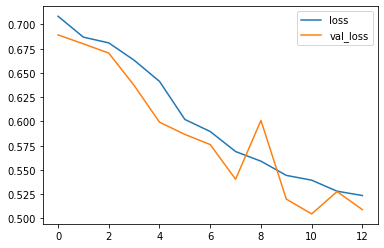

In [30]:
metrics_df[["loss","val_loss"]].plot();

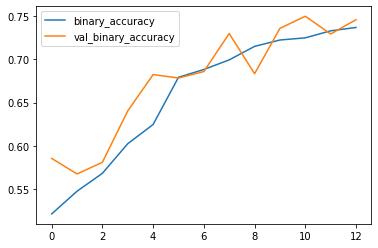

In [31]:
metrics_df[["binary_accuracy","val_binary_accuracy"]].plot();

In [32]:
loss, accuracy = model.evaluate(validation_set)
print('Accuracy on test dataset:', accuracy)

63/63 [==============================] - 19s 291ms/step - loss: 0.5091 - binary_accuracy: 0.7460
Accuracy on test dataset: 0.7459999918937683


In [33]:
import numpy as np
from keras.preprocessing import image

In [34]:
!wget --no-check-certificate \
    https://upload.wikimedia.org/wikipedia/commons/c/c7/Tabby_cat_with_blue_eyes-3336579.jpg \
    -O /tmp/cat.jpg

--2021-09-12 20:11:11--  https://upload.wikimedia.org/wikipedia/commons/c/c7/Tabby_cat_with_blue_eyes-3336579.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2114775 (2,0M) [image/jpeg]
Saving to: ‘/tmp/cat.jpg’

/tmp/cat.jpg        100%[===================>]   2,02M   420KB/s    in 4,9s    

2021-09-12 20:11:17 (420 KB/s) - ‘/tmp/cat.jpg’ saved [2114775/2114775]



In [35]:
test_image = image.load_img('/tmp/cat.jpg', target_size=(200, 200))

In [36]:
test_image = image.img_to_array(test_image)

In [37]:
test_image = np.expand_dims(test_image, axis=0)

In [38]:
prediction = model.predict(test_image)

In [39]:
prediction[0][0]

0.2902648

In [40]:
if prediction[0][0]>0.5:
  print(" is a dog")
else:
   print(" is a cat")

 is a cat


In [41]:
!wget --no-check-certificate \
    https://upload.wikimedia.org/wikipedia/commons/1/18/Dog_Breeds.jpg \
    -O /tmp/dog.jpg

--2021-09-12 20:11:32--  https://upload.wikimedia.org/wikipedia/commons/1/18/Dog_Breeds.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70761 (69K) [image/jpeg]
Saving to: ‘/tmp/dog.jpg’

/tmp/dog.jpg        100%[===================>]  69,10K   107KB/s    in 0,6s    

2021-09-12 20:11:33 (107 KB/s) - ‘/tmp/dog.jpg’ saved [70761/70761]



In [42]:
test_image2 = image.load_img('/tmp/dog.jpg', target_size=(200, 200))

In [43]:
test_image2 = np.expand_dims(test_image2, axis=0)
prediction = model.predict(test_image2)

In [44]:
if prediction[0][0]>0.5:
  print(" is a dog")
else:
   print(" is a cat")

 is a dog
